# HEART FAILURE PREDICTION

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [4]:
df=pd.read_csv('C:\\Users\\USER\\Desktop\\DATASETS AND CODES\\heart.csv')

In [5]:
df.head()   #TOP 5 VALUES OF THE DATA FRAME

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.shape                #number of rows and columns in the dataframe

(918, 12)

In [ ]:
# UNIQUE VALUES OF THE DATA FRAME

In [7]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [8]:
# NUMERICAL AND CATEGORICAL FEATURES DIVISION


In [9]:
numeric_col=[col for col in df if df[col].dtype !="object" ]
categorical_col=[col for col in df if df[col].dtype=="object" ]
numeric_col.remove("HeartDisease")
print("Numerical col:",numeric_col)
print("Categrical col:",categorical_col) 

Numerical col: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categrical col: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [12]:
#DESCRIPTION OF THE DATA

In [13]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [16]:
df.isna().sum()              #number of null values in each column

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [151]:
#AGE OF INDIVIDUALS


In [152]:
x=df['Age']

In [155]:
print(x)

0      40
1      49
2      37
3      48
4      54
       ..
913    45
914    68
915    57
916    57
917    38
Name: Age, Length: 918, dtype: int64


In [28]:
#DIVISION OF DATA FRAME INTO PEOPLE HAVING HEART DISEASE AND NOT HAVING HEART DISEASE

In [6]:
pat=df[df['HeartDisease']==1]

In [7]:
pat     #DATA FRAME HAVING THE DATA OF PEOPLE HAVING HEART DISEASE

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [8]:
non_pat=df[df['HeartDisease']==0]

In [9]:
non_pat             #DATA FRAME HAVING THE DATA OF PEOPLE HAVING NO HEART DISEASE

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0


# DISTRIBUTION OF AGE OF THE INDIVIDUALS

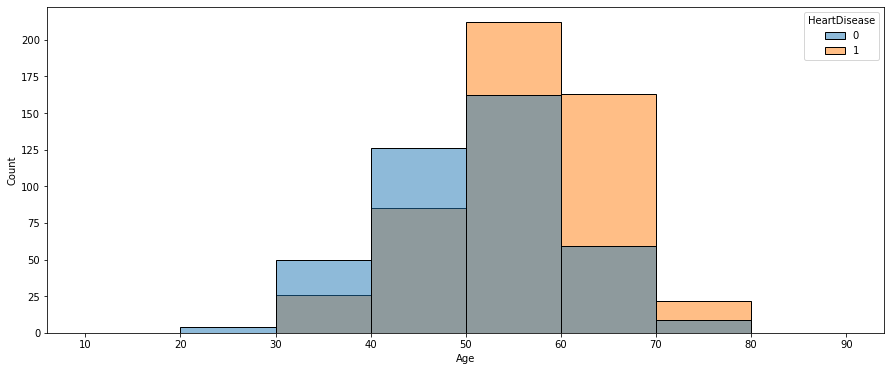

In [163]:
plt.figure(figsize=(15,6))
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
sns.histplot(data=df, x="Age", bins=bins, hue="HeartDisease");

# NUMBER OF MALES AND FEMALES

In [20]:
df['Sex'].value_counts()           #Number of males and females considered for sampling is having huge variation.So gender wise analysis is not going to give a good insight.

M    725
F    193
Name: Sex, dtype: int64

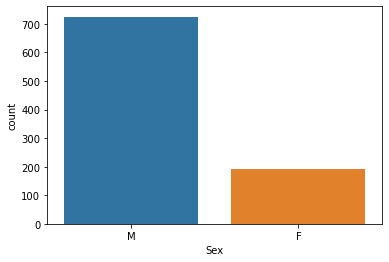

In [23]:
sns.countplot('Sex',data=df)
plt.show()

# TYPES OF CHEST PAIN OBSERVED

In [10]:
pat['ChestPainType'].value_counts()     #MOST OF THE PATIENTS ARE ASYMPTOMATIC

ASY    392
NAP     72
ATA     24
TA      20
Name: ChestPainType, dtype: int64

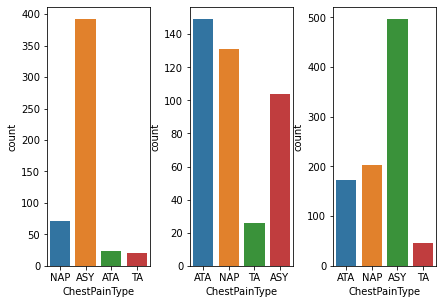

In [11]:
fig, axs = plt.subplots(ncols=3)
plt.subplots_adjust(left=0.001,
                    bottom=0.001, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


sns.countplot(x='ChestPainType',data=pat,ax=axs[0])
sns.countplot(x='ChestPainType',data=non_pat,ax=axs[1])
sns.countplot(x='ChestPainType',data=df,ax=axs[2])
plt.show()

# DISTRIBUTION OF BLOOD PRESSURE

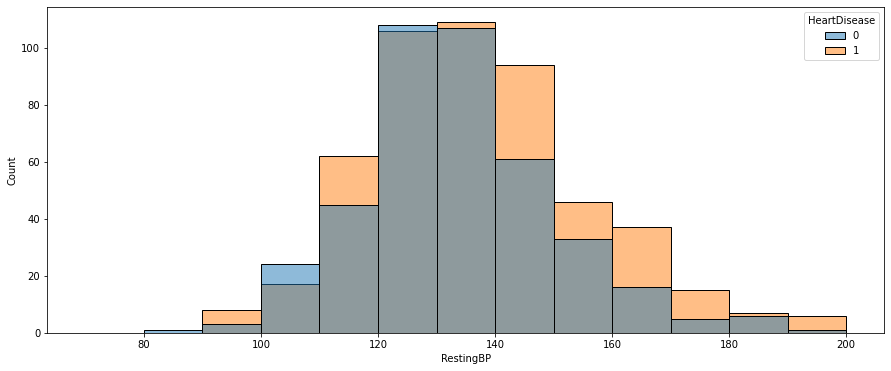

In [35]:

plt.figure(figsize=(15,6))
bins = [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
sns.histplot(data=df, x="RestingBP", bins=bins, hue="HeartDisease");

# DISTRIBUTION OF CHOLESTEROL

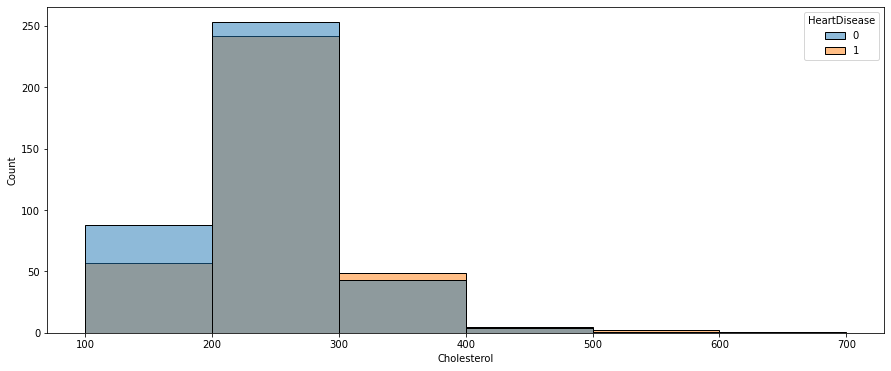

In [36]:
plt.figure(figsize=(15,6))
bins = [100,200,300,400,500,600,700]
sns.histplot(data=df, x="Cholesterol", bins=bins, hue="HeartDisease");

# BLOOD SUGAR PRESENT OR NOT?

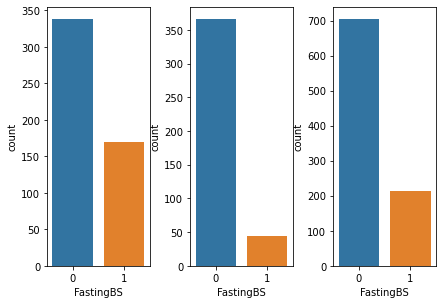

In [37]:
fig, axs = plt.subplots(ncols=3)
plt.subplots_adjust(left=0.001,
                    bottom=0.001, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


sns.countplot(x='FastingBS',data=pat,ax=axs[0])
sns.countplot(x='FastingBS',data=non_pat,ax=axs[1])
sns.countplot(x='FastingBS',data=df,ax=axs[2])
plt.show()


# NATURE OF ECG

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

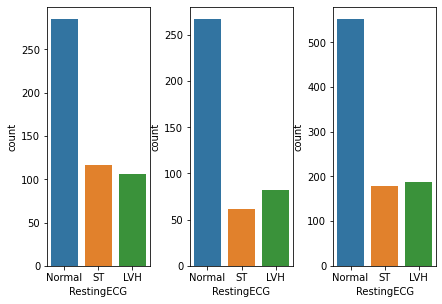

In [38]:
fig, axs = plt.subplots(ncols=3)
plt.subplots_adjust(left=0.001,
                    bottom=0.001, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
sns.countplot(x='RestingECG',data=pat,ax=axs[0])
sns.countplot(x='RestingECG',data=non_pat,ax=axs[1])
sns.countplot(x='RestingECG',data=df,ax=axs[2])

# DISTRIBUTION OF MAXIMUM HEART RATE 

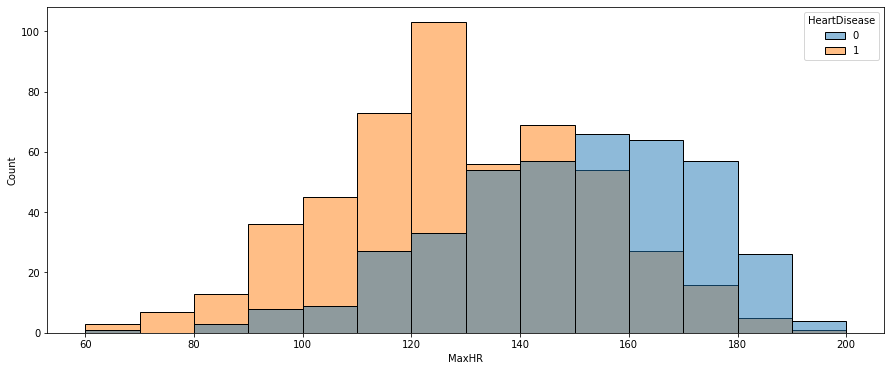

In [39]:
plt.figure(figsize=(15,6))
bins = [60,70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
sns.histplot(data=df, x="MaxHR", bins=bins, hue="HeartDisease");

# EXERCISE INDUCED ANGINA 

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

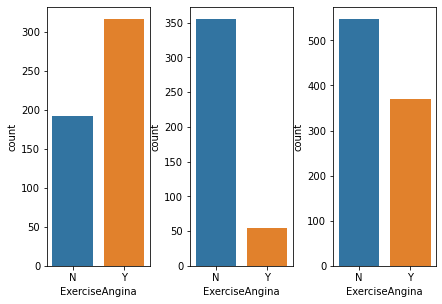

In [40]:
fig, axs = plt.subplots(ncols=3)
plt.subplots_adjust(left=0.001,
                    bottom=0.001, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

sns.countplot(x='ExerciseAngina',data=pat,ax=axs[0])
sns.countplot(x='ExerciseAngina',data=non_pat,ax=axs[1])
sns.countplot(x='ExerciseAngina',data=df,ax=axs[2])

# SLOPE OF THE PEAK EXERCISE ST SEGMENT

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

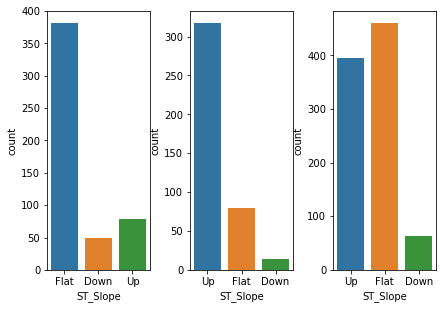

In [41]:
fig, axs = plt.subplots(ncols=3)
plt.subplots_adjust(left=0.001,
                    bottom=0.001, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

sns.countplot(x='ST_Slope',data=pat,ax=axs[0])
sns.countplot(x='ST_Slope',data=non_pat,ax=axs[1])
sns.countplot(x='ST_Slope',data=df,ax=axs[2])

# OLD PEAK VALUES


In [42]:
OP=pd.DataFrame(df.Oldpeak)
OP.describe()

,Oldpeak
count,918.000000
mean,0.887364
std,1.066570
min,-2.600000
25%,0.000000
50%,0.600000
75%,1.500000
max,6.200000


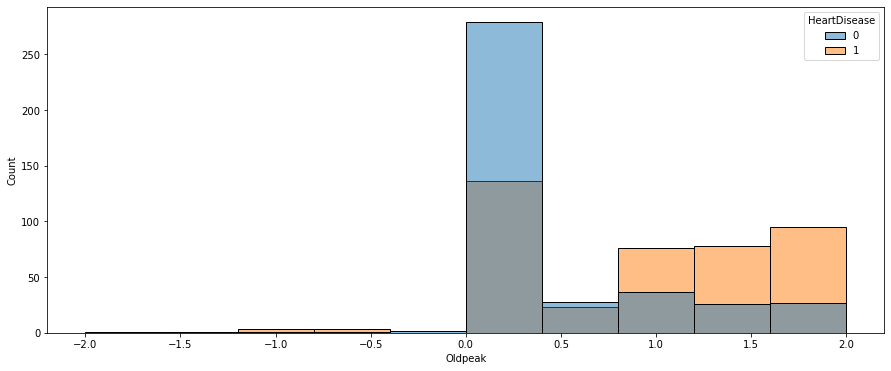

In [43]:
plt.figure(figsize=(15,6))
bins = [-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2]
sns.histplot(data=df, x="Oldpeak", bins=bins, hue="HeartDisease");

# CORRELATION MATRIX

<AxesSubplot:>

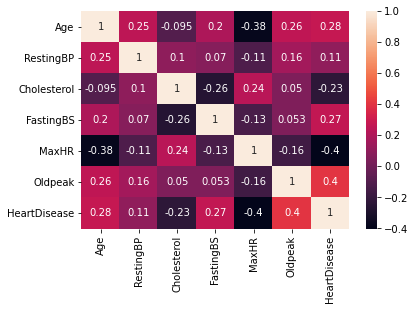

In [44]:
a=df.corr()
sns.heatmap(a,annot=True)


## #1.How Old Peak Values Vary With Age?

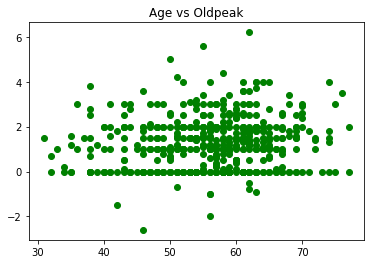

In [101]:
x=list(pat['Age'].values)
y=list(pat['Oldpeak'].values)
plt.scatter(x,y,color='g',label='green')
plt.title('Age vs Oldpeak')
plt.show()

### #2.Range of Max Heart Rate and Resting Blood Pressure Values of Individuals Having Heart Disease Grouped By Exercise Angina

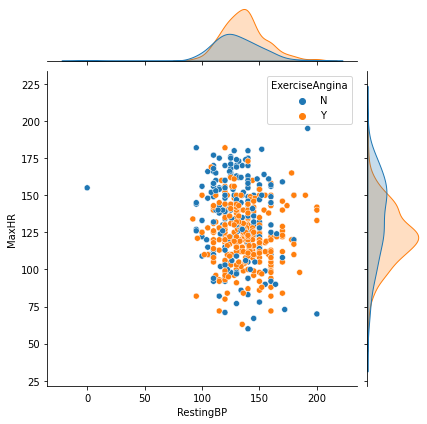

In [173]:
sns.jointplot(data=pat,x='RestingBP',y='MaxHR',hue='ExerciseAngina')

## #3. Range of Max Heart Rate and Resting Blood Pressure Values of Individuals Having Heart Disease Grouped By ST Slope.

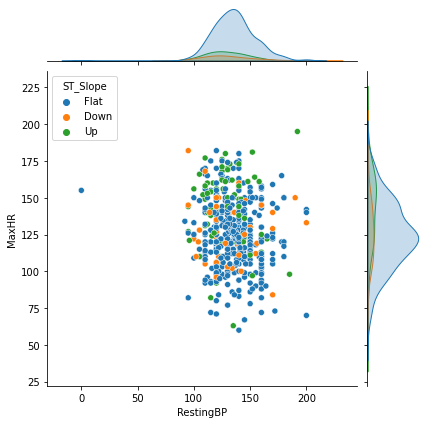

In [108]:
sns.jointplot(data=pat,x='RestingBP',y='MaxHR',hue='ST_Slope')

## #4.Old peak Values of Individuals Having Heart Disease with or without Blood Sugar grouped by Chest Pain Types

<AxesSubplot:xlabel='FastingBS', ylabel='Oldpeak'>

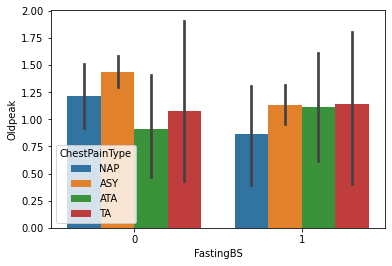

In [109]:
sns.barplot(data=pat,x='FastingBS',y='Oldpeak',hue='ChestPainType')

## #5. Old peak Values of Individuals Having Heart Disease with or without Blood Sugar grouped by Nature of ECG

<AxesSubplot:xlabel='FastingBS', ylabel='Oldpeak'>

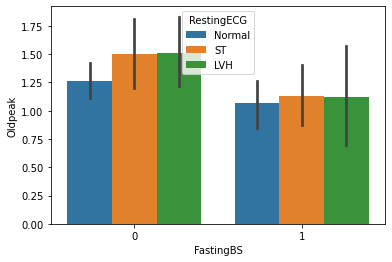

In [110]:
sns.barplot(data=pat,x='FastingBS',y='Oldpeak',hue='RestingECG')

## #6.Cholesterol values of Individuals Having or Not Having Heart Disease grouped by Exercise Angina

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

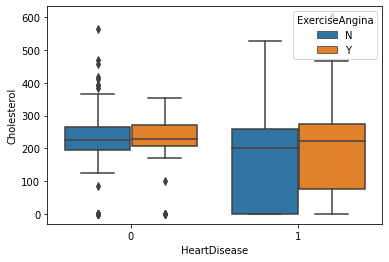

In [113]:
sns.boxplot(data=df,x='HeartDisease',y='Cholesterol',hue='ExerciseAngina')

## #7.Cholesterol values of Individuals Having or Not Having Heart Disease grouped by Nature of ECG

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

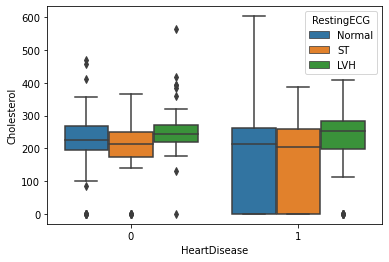

In [115]:
sns.boxplot(data=df,x='HeartDisease',y='Cholesterol',hue='RestingECG')

## #8.Cholesterol Values of Individuals of Different Age Groups having or not having Heart Diseases

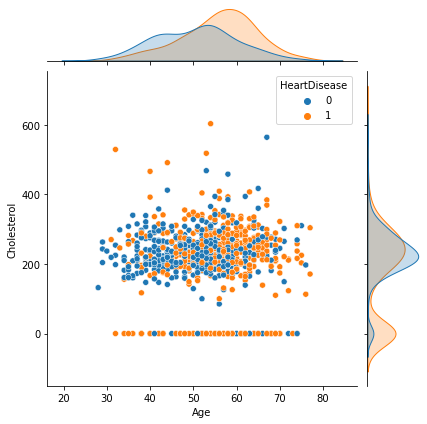

In [174]:
sns.jointplot(data=df,x='Age',y='Cholesterol',hue='HeartDisease')

## #9.Age group relation with Resting Blood Pressure Grouped by Having or Not Having Heart Disease

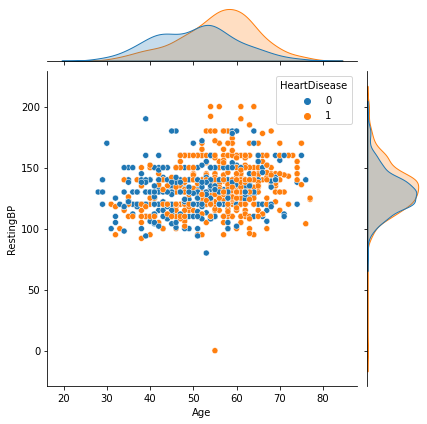

In [143]:
sns.jointplot(data=df,x='Age',y='RestingBP',hue='HeartDisease')

## #10.Cholesterol Values of Individuals of Different Age Groups having or not having Exercise Angina

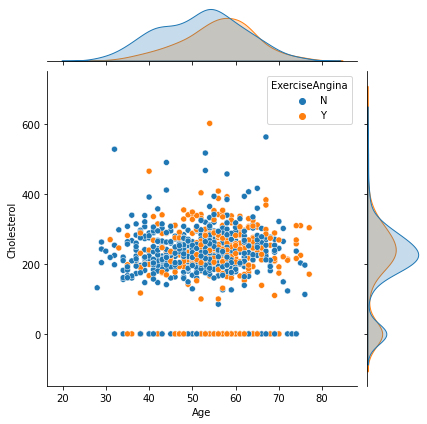

In [144]:
sns.jointplot(data=df,x='Age',y='Cholesterol',hue='ExerciseAngina')

## #11.Oldpeak values of Individuals having or not having Heart Disease grouped by ST_Slope

<AxesSubplot:xlabel='HeartDisease', ylabel='Oldpeak'>

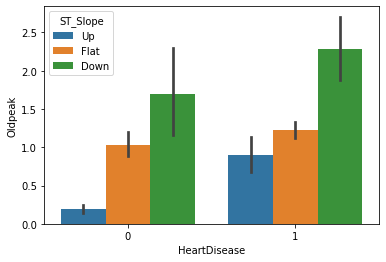

In [178]:
sns.barplot(data=df,x='HeartDisease',y='Oldpeak',hue='ST_Slope')